In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline


In [97]:
data = np.genfromtxt('MultiVarLR .csv',delimiter=',')

In [98]:
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [99]:
x= data[:,0:3]
y=data[:,-1].reshape(-1,1)
x.shape,y.shape

((25, 3), (25, 1))

In [100]:
# create 4 thetas because i have 4 features so need 4 thetas 
m=len(y)
ones=np.ones((len(y),1))
x=np.concatenate((ones,x),axis=1)
x

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [109]:
def Adam_MV_batch(X,y,learining_rate,beta1,beta2,epsloin,n_iteration):
    m=len(X)
    theta_inital=np.zeros((x.shape[1],1))
    all_loss=[]
    all_theta=[theta_inital.copy()]
    mt=np.zeros((x.shape[1],1))
    vt=np.zeros((x.shape[1],1))
   
    for i in range(n_iteration):
        print(f"*********** Iteration {i+1}***********************")
        #append thetas
        
        print("theta_inital  :",theta_inital ,"\n")
        all_theta.append(theta_inital.copy())
        
        #step 2 : h0(x)
        y_hat=x@theta_inital
        
        print('y_hat:',y_hat)
        
        #step3 mean square error #mse=loss(j)=error
        error_vector=y_hat-y
        loss = np.sum(error_vector**2) / (2 * m)
        all_loss.append(loss)
        
        print('error_vector:\n',error_vector,"\n")
        print('loss =',loss,"\n")
        
        #gradient step4 
        gradient = x.T @error_vector / m
        print('gradient :',gradient,"\n")
        grad_norm=np.linalg.norm(gradient)
        print('grad_norm :',grad_norm,"\n")
       
        
        #convergence check
        if grad_norm < 0.001:
            break
        
        # Stopping using loss
        if (i > 0) and abs(all_loss[i-1] - all_loss[i]) < 0.001:
            break
        #updating 
        #momentum_update 
        mt = beta1 * mt + (1 - beta1) * gradient
     
        #rms_updatw
        vt = beta2 * vt + (1 - beta2) * (gradient**2)
        
        #bias correction
        mt_hat = mt / (1 - beta1**(i + 1))
        vt_hat = vt / (1 - beta2**(i + 1))    
        # update_theta
        theta_inital = theta_inital - learining_rate * mt_hat / (np.sqrt(vt_hat) + epsloin)
    # Final predictions and cost
    all_theta=np.array(all_theta)
    final_cost = np.sum((final_predictions - y)**2) / (2 * m)

    return theta_inital, all_loss, all_theta,y_hat

In [110]:
theta_inital, all_loss, all_theta,y_hat= Adam_MV_batch(x, y, 0.05, 0.2,0.7, 1e-08, n_iteration=300)

*********** Iteration 1***********************
theta_inital  : [[0.]
 [0.]
 [0.]
 [0.]] 

y_hat: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
error_vector:
 [[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]] 

loss = 13405.98 

gradient : [[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]] 

grad_norm : 22917.545989219703 

*********** Iteration 2***********************
theta_inital  : [[0.05]
 [0.05]
 [0.05]
 [0.05]] 

y_hat: [[11.45]
 [13.75]
 [13.55]
 [14.75]
 [10.5 ]
 [ 7.75]
 [11.05]
 [ 8.2 ]
 [12.85]
 [11.9 ]
 [10.65]
 [10.5 ]
 [14.  ]
 [11.65]
 [11.1 ]
 [13.95]
 [11.1 ]
 [13.25]
 [13.35]
 [11.95]
 [12.95]
 [12.9 ]
 [12.35]
 [11.55]
 [14.25]]
error_vector:
 [[-140.55]
 [-171.25]
 [-166.45]
 [-181.25]
 [

In [111]:
len(all_loss)

272

In [112]:
len(all_theta[:-1])

272

In [113]:
def summary_plots(costs, all_theta):
    #for loss 
    plt.plot(costs,label='costs', marker='*', markersize=5)
    plt.xlabel('Iterations')
    plt.ylabel('loss')
    plt.title("epoch_loss")
    plt.show()


   
   
    for i in range(all_theta[0].shape[0]):
        plt.figure(figsize=(8, 20))
        plt.subplot(all_theta[0].shape[0], 1, i+1)
        plt.plot([theta[i] for theta in all_theta], costs,label=f'Theta {i}', marker="*", markersize=5)
        plt.title(f'Loss vs Theta {i}')
        plt.xlabel(f'Theta {i}')
        plt.ylabel("loss")
    plt.tight_layout()
    plt.show()


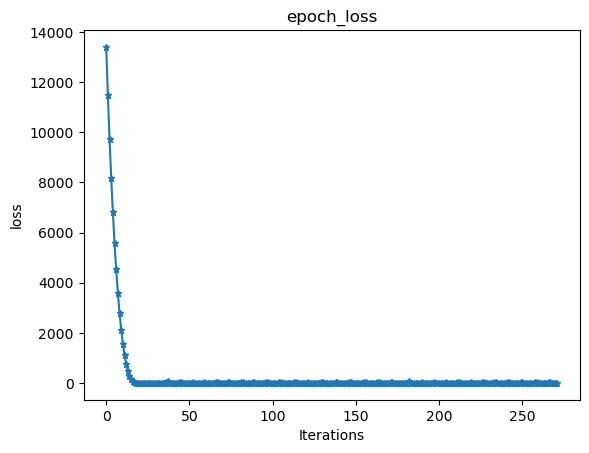

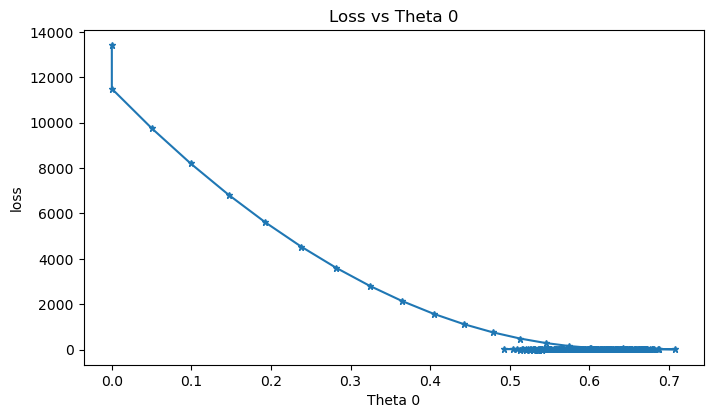

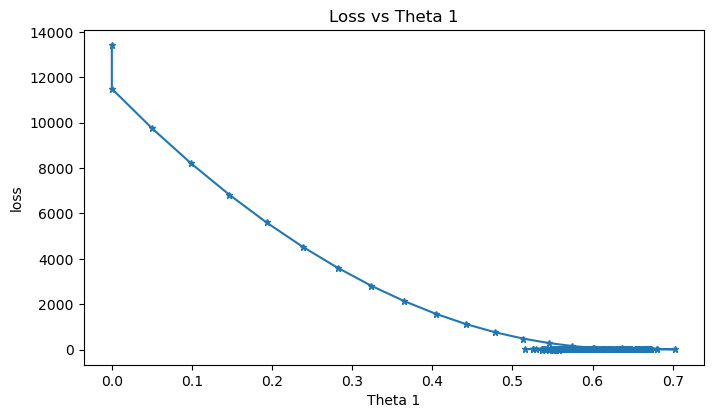

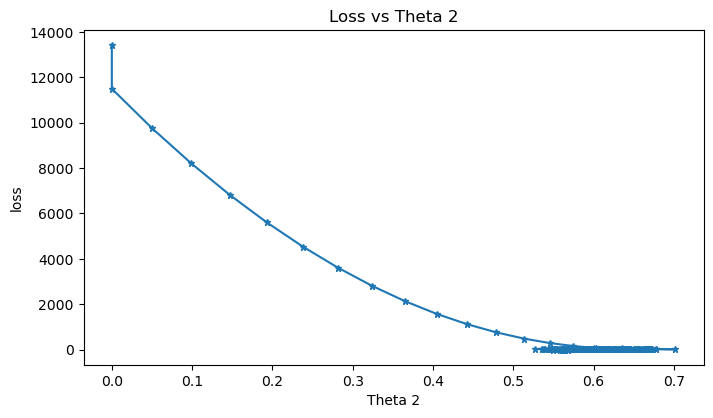

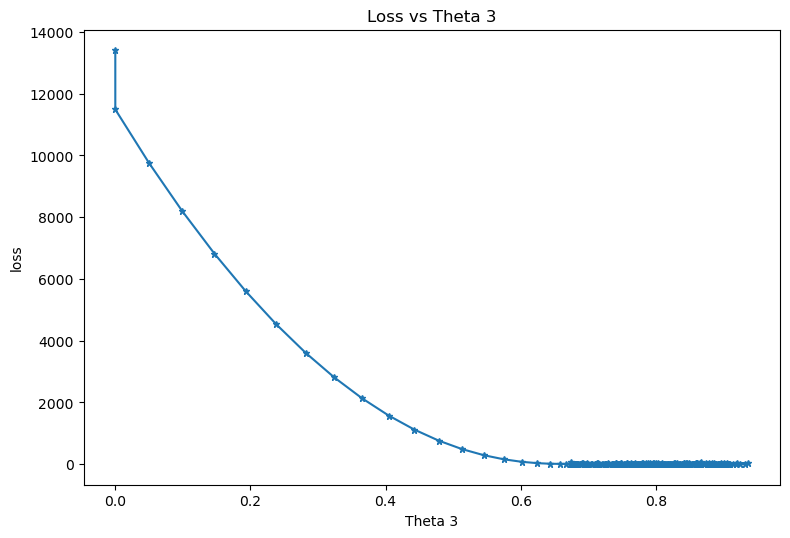

In [114]:
summary_plots(all_loss, all_theta[:-1])

In [83]:
r2_score(y,y_hat)

0.9862581385795189

In [160]:
def Adam_MV_Minibatch(X,y,learining_rate,beta1,beta2,batch_size,epsloin,n_iteration):
    m=len(X)
    theta_inital=np.zeros((x.shape[1],1))
    all_loss=[]
    all_theta=[theta_inital.copy()]
    mt=np.zeros((x.shape[1],1))
    vt=np.zeros((x.shape[1],1))
    for i in range(n_iteration):
        print(f"*********** Iteration {i+1}***********************")
        for j in range(0,len(x),batch_size):
            #append thetas
            print("theta_inital  :",theta_inital ,"\n")
            all_theta.append(theta_inital.copy())
            #step 2 : h0(x)
            x_batch =x[j:j+batch_size]
            y_batch= y[j:j+batch_size]
            
            y_hat=x_batch@theta_inital
            print('y_hat:',y_hat)
            #step3 mean square error #mse=loss(j)=error
            error_vector=y_hat-y_batch
            loss = np.sum(error_vector**2) / (2 * len(x_batch))
            all_loss.append(loss)
            
            print('error_vector:\n',error_vector,"\n")
            print('loss =',loss,"\n")
            
            #gradient step4 
            gradient = (x_batch.T @error_vector) /len(x_batch)
            print('gradient :',gradient,"\n")
            grad_norm=np.linalg.norm(gradient)
            print('grad_norm :',grad_norm,"\n")
            #convergence check
            if grad_norm < 0.001:
                return theta_inital, all_loss, all_theta,y_hat
            #momentum_update 
            mt = beta1 * mt + (1 - beta1) * gradient
            
            #rms_updatw
            vt = beta2 * vt + (1 - beta2) * (gradient**2)
            
            #bias correction
            mt_hat = mt / (1 - beta1**(i + 1))
            vt_hat = vt / (1 - beta2**(i + 1))   
            
            # update_theta
            theta_inital = theta_inital - learining_rate * mt_hat / (np.sqrt(vt_hat) + epsloin)
            # ckeck loss 
            
        if i > 0 and abs(all_loss[-int(np.ceil(len(X)/batch_size)+1)] - all_loss[-1]) < 0.001:
            break
                  
        # step 5
        print(f"m{i} : ",mt,"\n" )
        print(f"v_t{i} :",vt ,"\n")
        print(f"mt_hat{i}_ :",mt_hat ,"\n")
        print(f"vt_hat{i}_ : ",vt_hat,"\n" )
        print("theta_ New :",theta_inital ,"\n")
    y_final = x @ theta_inital
    all_theta=np.array(all_theta)
    return theta_inital, all_loss, all_theta,y_hat,y_final

In [161]:
theta_inital, all_loss, all_theta,y_hat,y_final= Adam_MV_Minibatch(x, y, 0.05, 0.2,0.7,5,1e-08, n_iteration=300)

*********** Iteration 1***********************
theta_inital  : [[0.]
 [0.]
 [0.]
 [0.]] 

y_hat: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
error_vector:
 [[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]] 

loss = 14830.9 

gradient : [[  -171. ]
 [-14700.6]
 [-14680. ]
 [-14869. ]] 

grad_norm : 25548.511548816303 

theta_inital  : [[0.05]
 [0.05]
 [0.05]
 [0.05]] 

y_hat: [[ 7.75]
 [11.05]
 [ 8.2 ]
 [12.85]
 [11.9 ]]
error_vector:
 [[ -93.25]
 [-137.95]
 [-106.8 ]
 [-162.15]
 [-152.1 ]] 

loss = 8855.90375000133 

gradient : [[  -130.45]
 [ -9120.67]
 [ -8787.09]
 [-10027.44]] 

grad_norm : 16154.44651088793 

theta_inital  : [[0.09252044]
 [0.08938307]
 [0.08881353]
 [0.09068369]] 

y_hat: [[19.09680895]
 [18.83280807]
 [25.09464734]
 [20.87877494]
 [19.90605108]]
error_vector:
 [[-121.90319105]
 [-122.16719193]
 [-158.90535266]
 [-131.12122506]
 [-128.09394892]] 

loss = 8863.695728605959 

gradient : [[  -132.43818192]
 [-10213.27492374]
 [-10282.13112545]
 [-10392.57393725]] 

grad_norm : 17834.

In [162]:
r2_score(y,y_final)

0.9831312953794581

In [205]:
y.shape,y_final.shape

((25, 1), (25, 4))

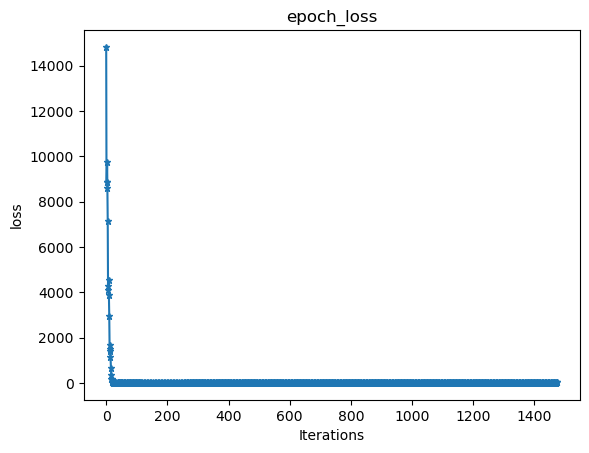

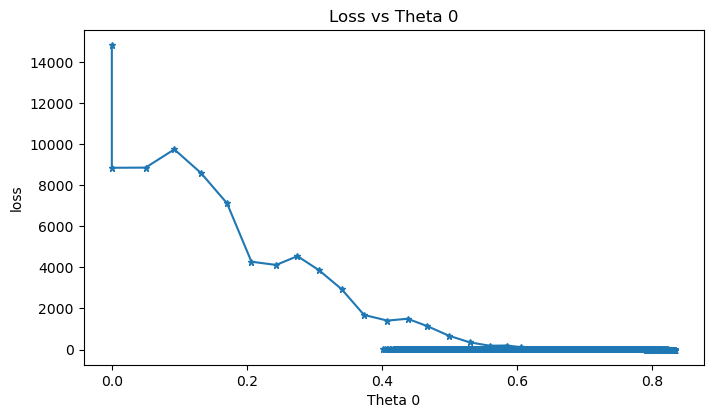

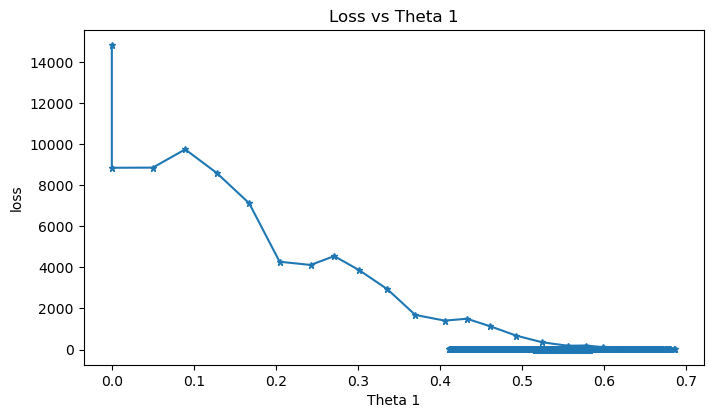

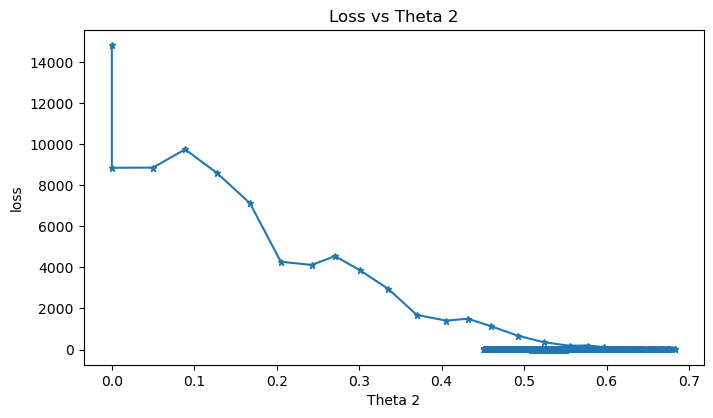

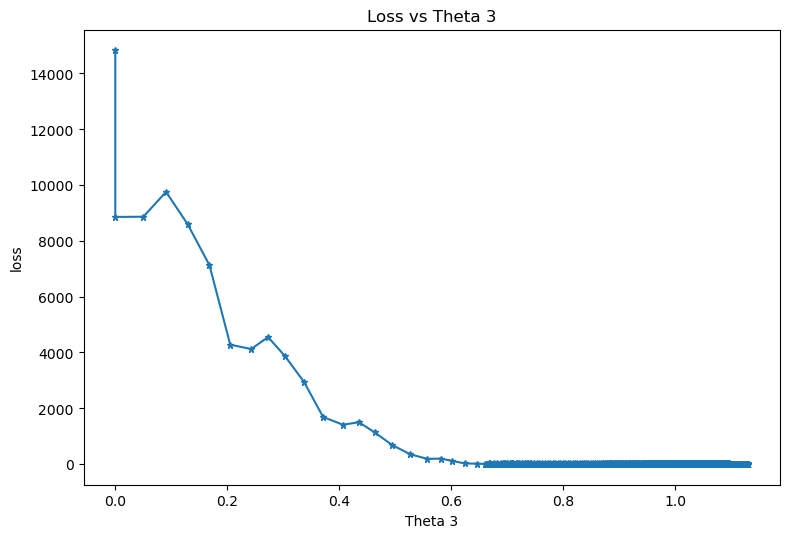

In [163]:
summary_plots(all_loss, all_theta[:-1])

In [206]:
def Adam_MV_stocatic(x,y,learining_rate,beta1,beta2,epsloin,n_iteration):
    m=len(x)
    theta_inital=np.zeros((x.shape[1],1))
    all_loss=[]
    all_theta=[theta_inital.copy()]
    mt=np.zeros((x.shape[1],1))
    vt=np.zeros((x.shape[1],1))
    for i in range(n_iteration):
        print(f"*********** Iteration {i+1}***********************")
        for j in range(m):
            #append thetas
            print("theta_inital  :",theta_inital ,"\n")
            all_theta.append(theta_inital.copy())
           
            #step 2 : h0(x)
            y_hat = x[j] @ theta_inital
            print('y_hat:',y_hat)
            #step3 mean square error #mse=loss(j)=error
            error_vector=y_hat-y[j]
            loss = np.sum(error_vector**2) / 2
            all_loss.append(loss)
            
            print('error_vector:\n',error_vector,"\n")
            print('loss =',loss,"\n")
            
            #gradient step4 
            
            gradient = x[j].reshape(-1, 1) * error_vector
            grad_norm = np.linalg.norm(gradient)
           
            print('gradient :',gradient,"\n")
            
            #momentum_update 
            mt = beta1 * mt + (1 - beta1) * gradient
            #rms_updatw
            vt = beta2 * vt + (1 - beta2) * (gradient**2)
            #bias correction
            mt_hat = mt / (1 - beta1**(i + 1))
            vt_hat = vt / (1 - beta2**(i + 1))   
            # update_theta
            theta_inital = theta_inital - (learining_rate / (np.sqrt(vt_hat) + epsloin)) * mt_hat
            
        print("theta_new  :", theta_inital, "\n")
        print('h(x):', y_hat)
        print('Error Vector:\n', error_vector, "\n")
        print('Current Loss:', loss, "\n")
        grad_norm=np.linalg.norm(gradient)
        print('grad_norm :',grad_norm,"\n")
        all_loss.append(loss)
            # ckeck loss 
            
        # Gradient Check
        if grad_norm < 0.001:
            break

        # convergence check
        if i > 0 and abs(all_loss[-2] - all_loss[-1]) < 0.001:
            break

        # step 5
        print(f"m_theda{i} : ", mt, "\n")
        print(f"v_theda{i} :", vt, "\n")
        print(f"m_hat_theta{i}_corrected :", mt_hat, "\n")
        print(f"v_hat_theta{i}_corrected : ", vt_hat, "\n")
        print("theta_ New :", theta_inital, "\n")

    y_final = x @ theta_inital
    return theta_inital, all_loss, all_theta,y_hat,y_final

In [212]:
x.shape,y.shape

((25, 4), (25, 1))

In [207]:
theta_inital, all_loss, all_theta,y_hat,y_final= Adam_MV_stocatic(x, y, 0.05, 0.2,0.7,1e-08, n_iteration=300)

*********** Iteration 1***********************
theta_inital  : [[0.]
 [0.]
 [0.]
 [0.]] 

y_hat: [0.]
error_vector:
 [-152.] 

loss = 11552.0 

gradient : [[  -152.]
 [-11096.]
 [-12160.]
 [-11400.]] 

theta_inital  : [[0.05]
 [0.05]
 [0.05]
 [0.05]] 

y_hat: [13.75]
error_vector:
 [-171.25] 

loss = 14663.2812500026 

gradient : [[  -171.25]
 [-15926.25]
 [-15070.  ]
 [-15926.25]] 

theta_inital  : [[0.09726782]
 [0.09921604]
 [0.09812815]
 [0.09903677]] 

y_hat: [26.7704668]
error_vector:
 [-153.2295332] 

loss = 11739.6449218957 

gradient : [[  -153.2295332 ]
 [-13637.42845454]
 [-13943.88752093]
 [-13790.65798774]] 

theta_inital  : [[0.13841203]
 [0.14114975]
 [0.14039404]
 [0.14099987]] 

y_hat: [41.54739124]
error_vector:
 [-154.45260876] 

loss = 11927.804176050817 

gradient : [[  -154.45260876]
 [-14827.45044075]
 [-15136.35565827]
 [-15445.26087578]] 

theta_inital  : [[0.17701845]
 [0.18136636]
 [0.18095227]
 [0.1817137 ]] 

y_hat: [38.07957192]
error_vector:
 [-103.920428

In [208]:
y_hat.shape,y_final.shape

((1,), (25, 1))

In [209]:
final_predictions = x@ theta_inital
r2_score(y,final_predictions)

0.9722959041677472

In [210]:
r2_score(y,x@theta_inital)

0.9722959041677472

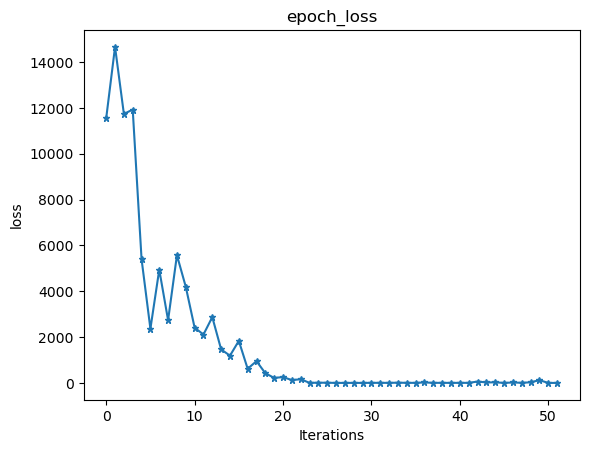

ValueError: x and y must have same first dimension, but have shapes (50, 1) and (52,)

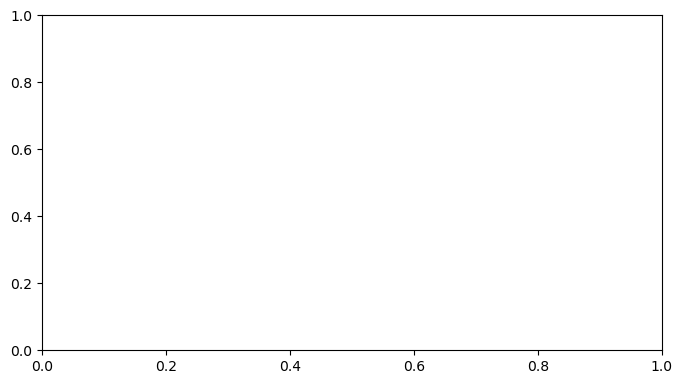

In [213]:
summary_plots(all_loss, all_theta[:-1])